In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

In [2]:
with open('./dataset/ck.pikle','rb') as f:
    ck_data, ck_label = pickle.load(f)

In [35]:
image_hog_ck_data = []
feature_hog_ck_data = []

for image in ck_data :
    image = image.reshape(128,128)
    feature, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, block_norm='L1')
    feature_hog_ck_data.append(feature)
    image_hog_ck_data.append(hog_image)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(feature_hog_ck_data, ck_label, test_size=0.25, random_state=42)

In [36]:
target_classes = ["Neutral", "Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise"]

clf = SVC(kernel='rbf', class_weight='balanced', gamma=0.0001, C=1000.0)

clf = clf.fit(ck_data_train, ck_label_train)
ck_label_predict = clf.predict(ck_data_test)

print(classification_report(ck_label_test, ck_label_predict, target_names=target_classes))
print(confusion_matrix(ck_label_test, ck_label_predict, labels=range(7)))
print(accuracy_score(ck_label_test, ck_label_predict))

              precision    recall  f1-score   support

     Neutral       0.92      0.92      0.92        12
       Angry       0.75      0.82      0.78        11
     Disgust       1.00      1.00      1.00        11
        Fear       1.00      0.83      0.91         6
       Happy       0.94      1.00      0.97        15
         Sad       0.80      0.67      0.73         6
    Surprise       1.00      1.00      1.00        21

   micro avg       0.93      0.93      0.93        82
   macro avg       0.91      0.89      0.90        82
weighted avg       0.93      0.93      0.93        82

[[11  1  0  0  0  0  0]
 [ 1  9  0  0  0  1  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  5  1  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  2  0  0  0  4  0]
 [ 0  0  0  0  0  0 21]]
0.926829268292683


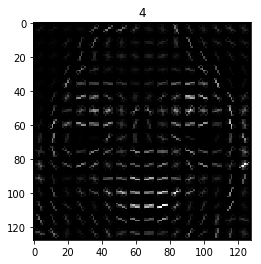

In [40]:
plt.imshow(image_hog_ck_data[0], cmap='gray')
plt.title(ck_label[0])
plt.show()